# Get the data and imports

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2023-02-25 14:54:06--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 104.21.23.210, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: 'airline_passengers.csv'

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2023-02-25 14:54:06 (12.7 MB/s) - 'airline_passengers.csv' saved [2036/2036]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [4]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Month'>

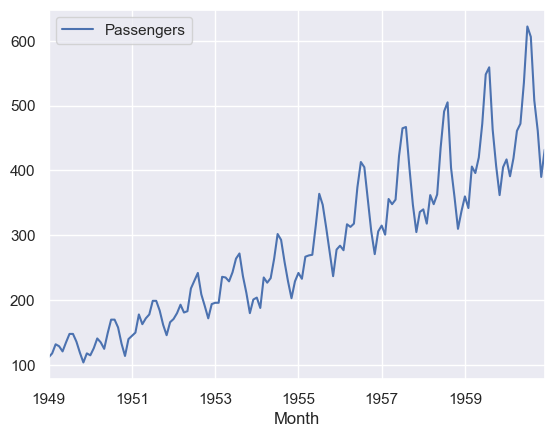

In [5]:
df.plot()

# Calculate the 1st Difference and log

<Axes: xlabel='Month'>

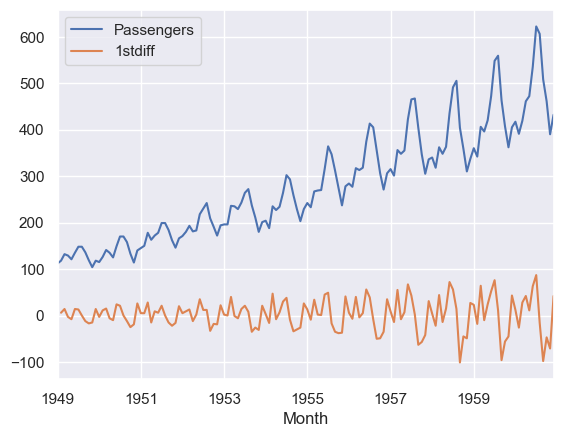

In [6]:
df['1stdiff'] = df['Passengers'].diff()
df.plot()

<Axes: xlabel='Month'>

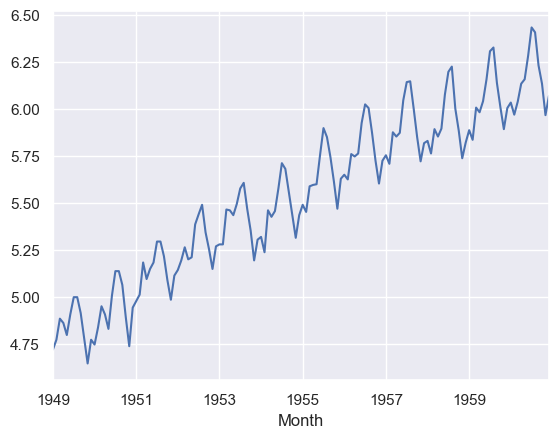

In [7]:
df['logPassengers'] = np.log(df['Passengers'])
df['logPassengers'].plot()

# Import and Fit ARIMA

In [14]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
# set the frequency to be monthly
df.index.freq = 'MS'

# prepare train and test datasets
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

## Test an AR model

<Axes: xlabel='Month'>

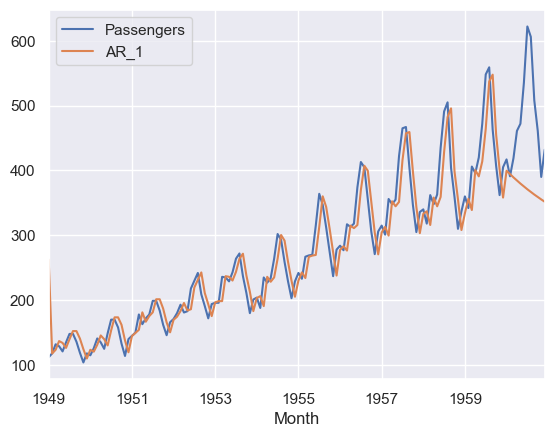

In [70]:
arima = ARIMA(train['Passengers'], order=(1,0,0))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
df[['Passengers', 'AR_1']].plot()

In [71]:
def plot_fit_and_forecast(results):
    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.plot(df['Passengers'], label='data')

    train_pred = results.fittedvalues
    ax.plot(train.index, train_pred, color='green', label='fitted')

    predResults = results.get_forecast(steps=Ntest)
    forecast = predResults.predicted_mean
    confint = predResults.conf_int()
    ax.plot(test.index, forecast, color='red', label='forecast')
    ax.fill_between(test.index, confint.iloc[:, 0], confint.iloc[:, 1], color='pink', alpha=0.3)

    ax.legend()

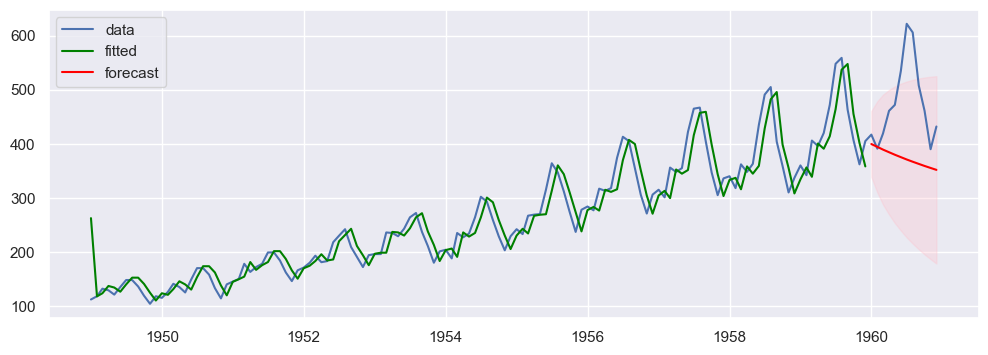

In [72]:
plot_fit_and_forecast(arima_results)

/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


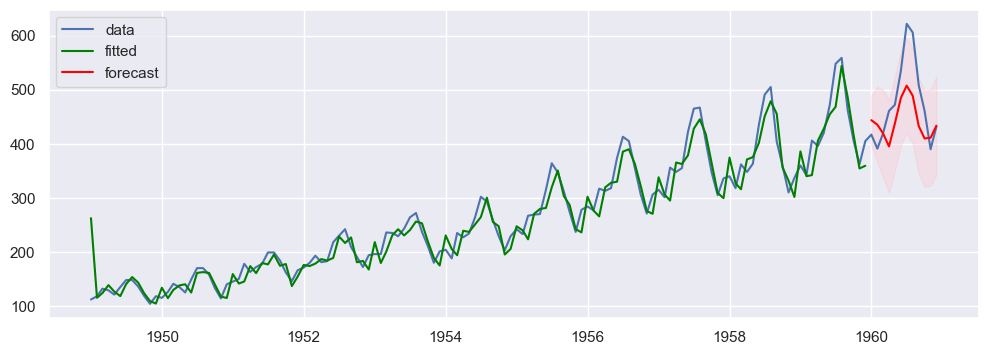

In [73]:
arima = ARIMA(train['Passengers'], order=(10,0,0))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
plot_fit_and_forecast(arima_results)

## Test MA Model

/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


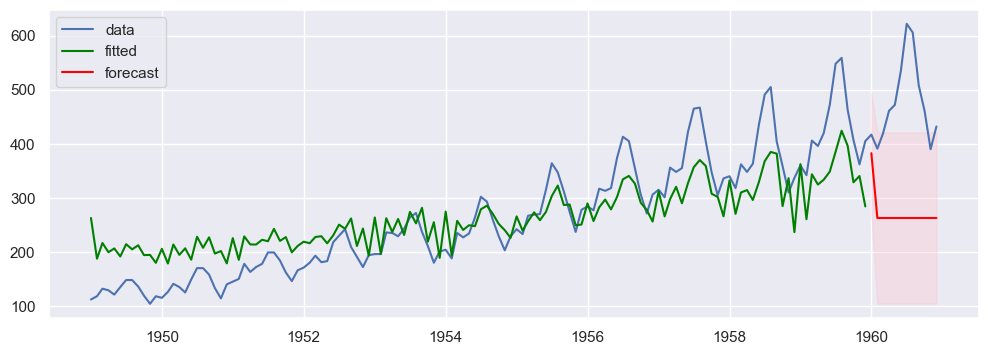

In [74]:
arima = ARIMA(train['Passengers'], order=(0,0,1))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
plot_fit_and_forecast(arima_results)

## Test ARIMA models

/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


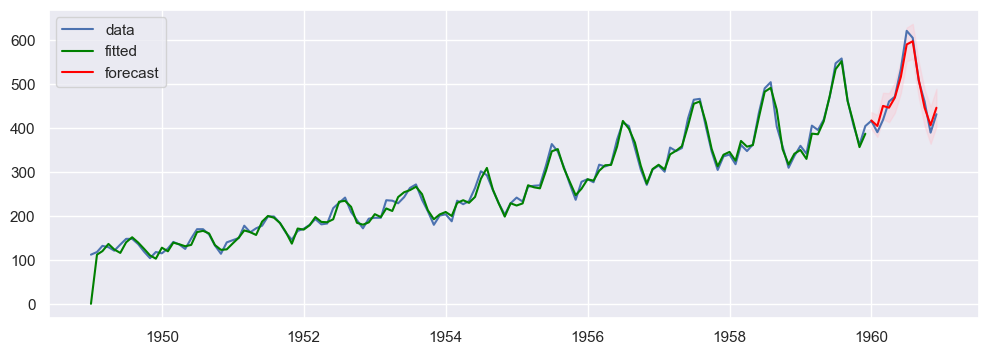

In [75]:
arima = ARIMA(train['Passengers'], order=(12,1,10))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
plot_fit_and_forecast(arima_results)

# Investigate using log-passengers

<Axes: xlabel='Month'>

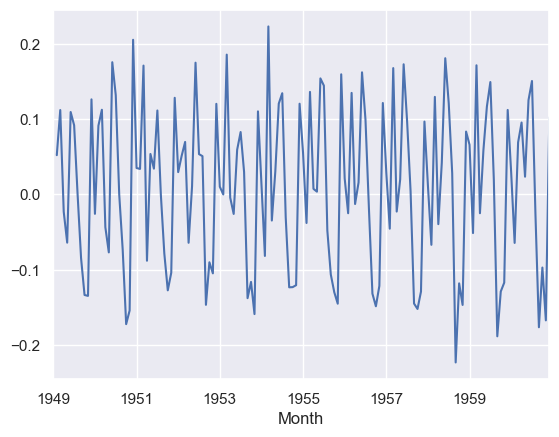

In [76]:
df['logPassengers1stdiff'] = df['logPassengers'].diff()
df['logPassengers1stdiff'].plot()

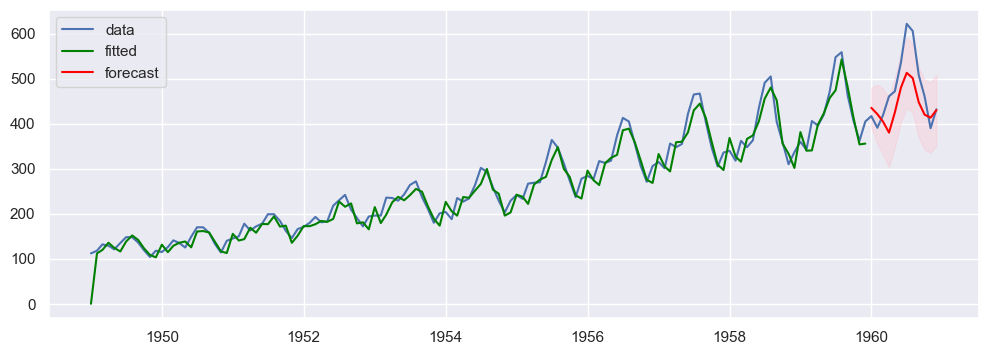

In [82]:
arima = ARIMA(train['Passengers'], order=(8,1,1))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
plot_fit_and_forecast(arima_results)

In [108]:
def plot_fit_and_forecast_int(results, d, col='Passengers'):
    """ARIMA results plotter

    Parameters
    ----------
    results : ARIMA results object
    d : int
        first row in difference time series
    col : str
        column name to plot

    Returns
    -------
    None
    """

    fig, ax = plt.subplots(1, 1, figsize=(12, 4))
    ax.plot(df[col], label='data')

    train_pred = results.predict(start=train.index[d], end=train.index[-1], typ='levels') #typ='levels instead of predicting the difference time series, accumulated back to the original level
    ax.plot(train.index[d:], train_pred, color='green', label='fitted')

    predResults = results.get_forecast(steps=Ntest)
    forecast = predResults.predicted_mean
    confint = predResults.conf_int()
    ax.plot(test.index, forecast, color='red', label='forecast')
    ax.fill_between(test.index, confint.iloc[:, 0], confint.iloc[:, 1], color='pink', alpha=0.3)

    ax.legend()

def plot_differences(result, d, col='Passengers'):
    """Plot the differences between the original data and the fitted data

    Parameters
    ----------
    result : ARIMA results object
    d : int
        first row in difference time series
    col : str
        column name to plot

    Returns
    -------
    None
    """

    train_pred = result.predict(start=train.index[d], end=train.index[-1]).diff()
    diff = df[col].diff()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(diff, label='true 1st difference')
    ax.plot(train_pred, label='fitted 1st difference');

def rmse(results, is_logged):
    """Calculate the RMSE

    Parameters
    ----------
    results : ARIMA results object
    is_logged : bool
        True if using the logged data

    Returns
    -------
    float
        RMSE
    """

    if is_logged:
        train_pred = results.get_forecast(steps=Ntest)
        train_pred = train_pred.predicted_mean
        train_pred = np.exp(train_pred)
    else:
        train_pred = results.get_forecast(steps=Ntest)
        train_pred = train_pred.predicted_mean

    t = test['Passengers']
    y = train_pred

    return np.sqrt(np.mean((t - y)**2))

def run_all_functions(results, d, is_logged=False, col='Passengers'):
    """Run all the functions

    Parameters
    ----------
    results : ARIMA results object
    d : int
        first row in difference time series
    is_logged : bool
        True if using the logged data
    col : str
        column name to plot

    Returns
    -------
    None
    """

    plot_fit_and_forecast_int(results, d, col=col)
    plot_differences(results, d, col=col)
    print('RMSE: ', rmse(results, is_logged))


RMSE:  59.06458984615128


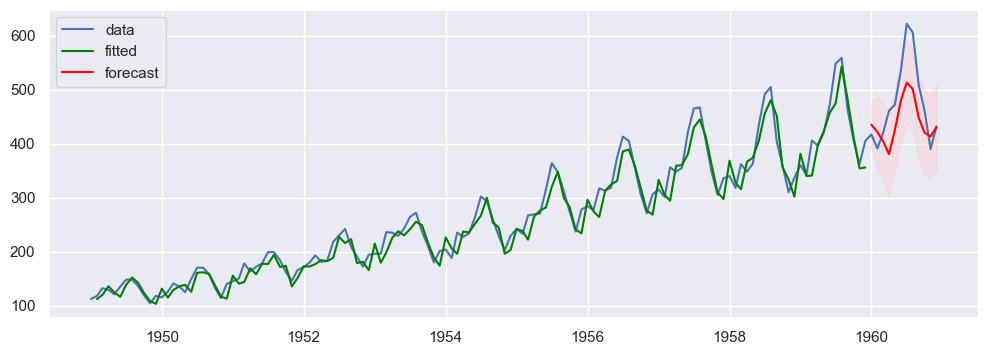

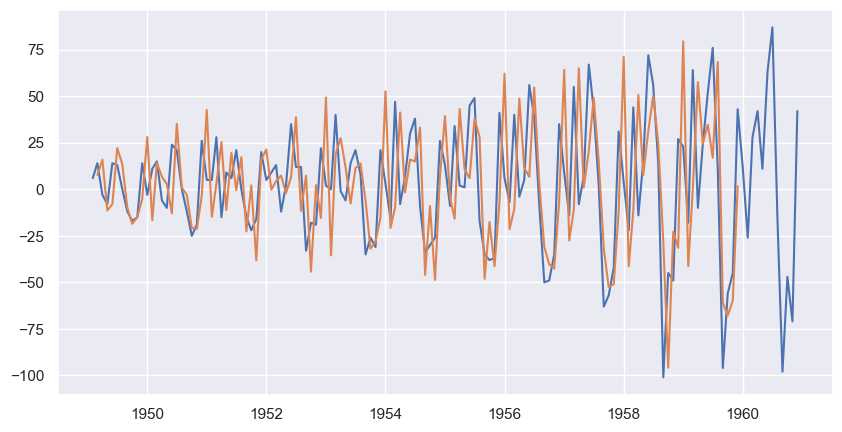

In [109]:
run_all_functions(arima_results, 1, is_logged=False)

RMSE:  61.601478220064436


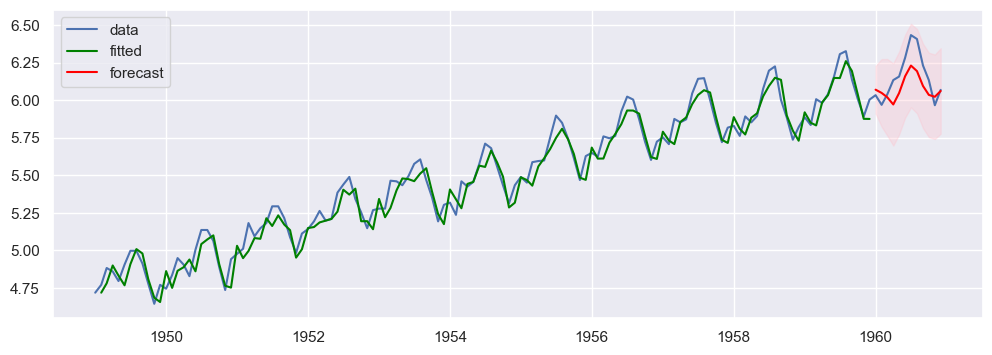

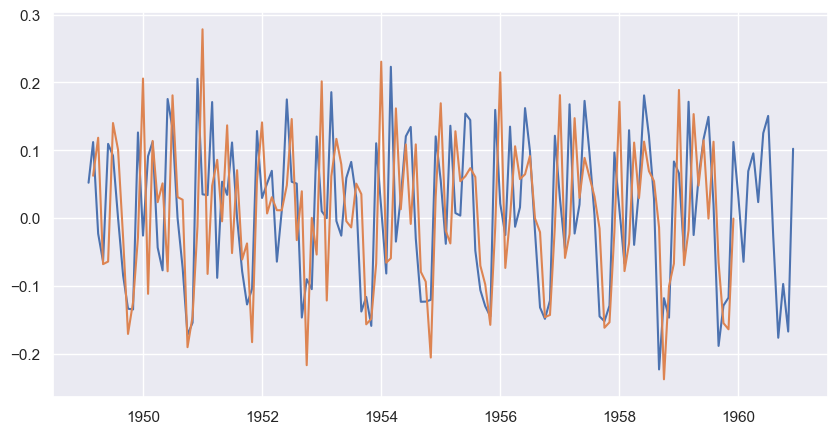

In [110]:
arima = ARIMA(train['logPassengers'], order=(8,1,1))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
run_all_functions(arima_results, 1, is_logged=True, col='logPassengers')

/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  16.99748332593779


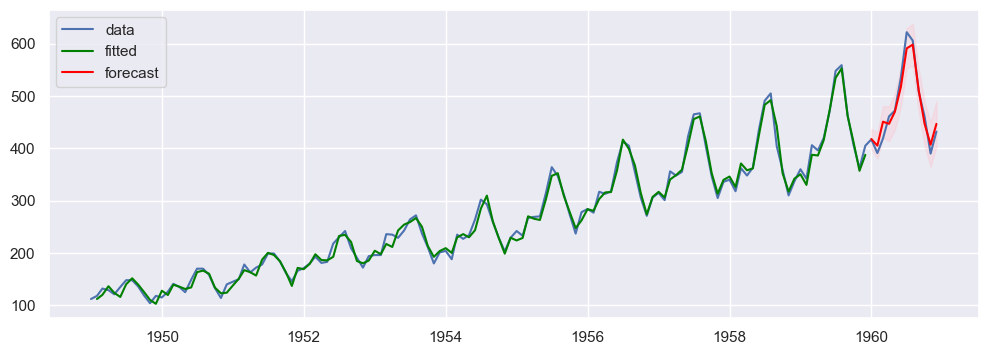

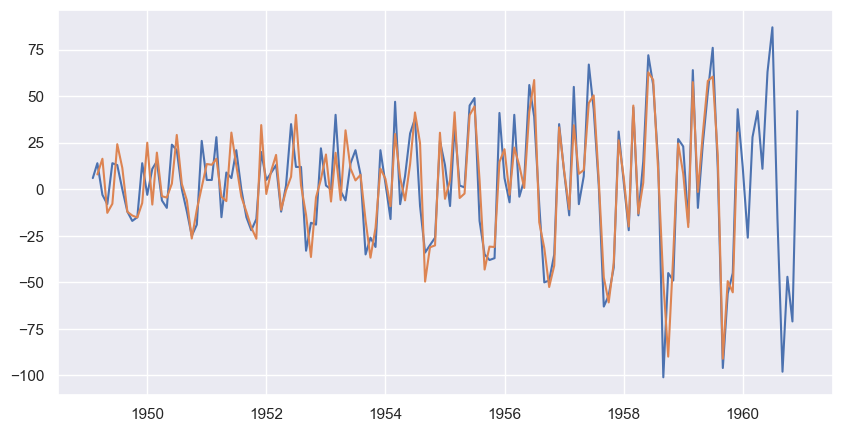

In [114]:
arima = ARIMA(train['Passengers'], order=(12,1,10))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
run_all_functions(arima_results, 1, is_logged=False, col='Passengers')

/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  18.131362854399477


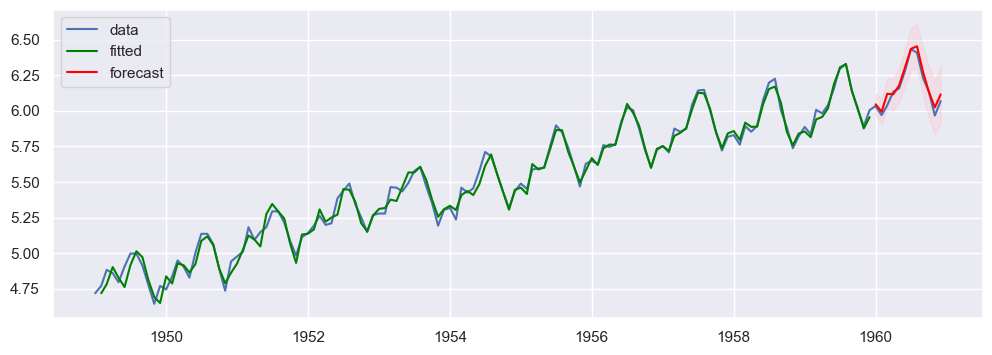

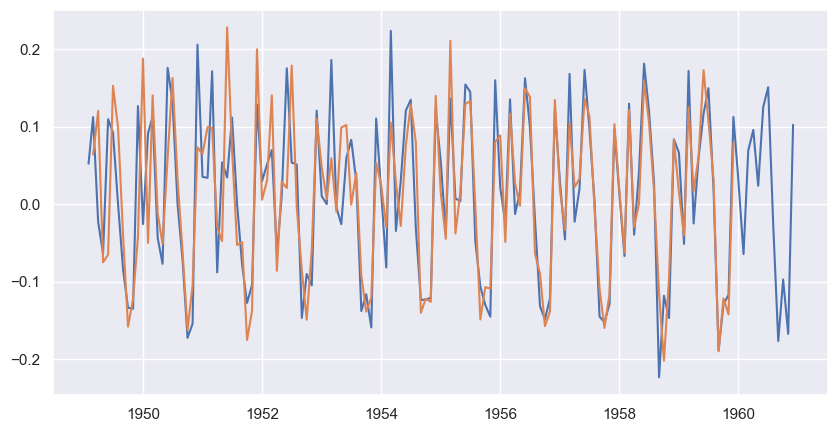

In [112]:
arima = ARIMA(train['logPassengers'], order=(12,1,10))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
run_all_functions(arima_results, 1, is_logged=True, col='logPassengers')

/Users/andreiroibu/opt/anaconda3/envs/AIforFinancialEngineering/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE:  16.164563641833702


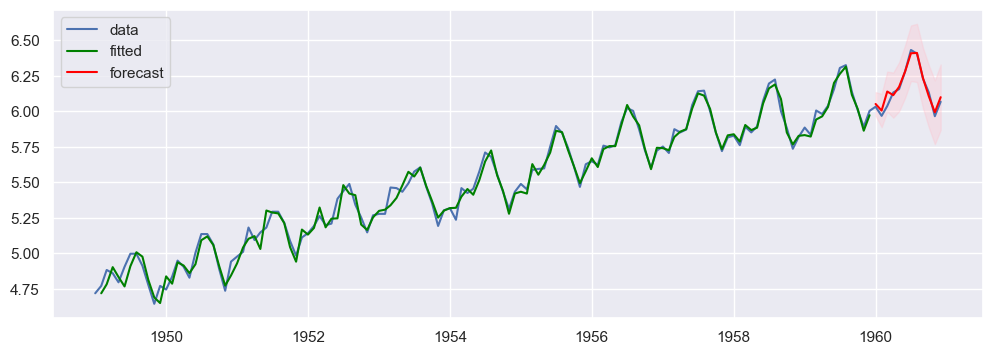

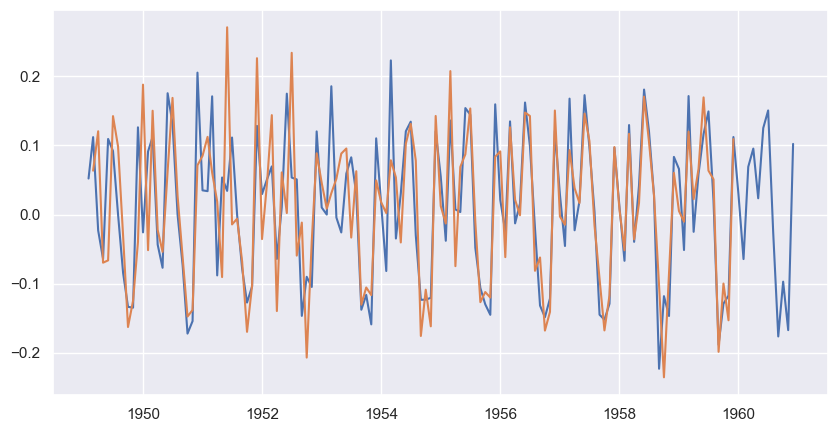

In [113]:
arima = ARIMA(train['logPassengers'], order=(12,1,0))
arima_results = arima.fit()
df.loc[train_idx, 'AR_1'] = arima_results.predict(start=train.index[0], end=train.index[-1])
# forecast, stderr, confint = arima_results.forecast(steps=Ntest)
forecast = arima_results.forecast(steps=Ntest)
df.loc[test_idx, 'AR_1'] = forecast
run_all_functions(arima_results, 1, is_logged=True, col='logPassengers')